In [1]:
import pandas as pd 

stroke_dft  = pd.read_csv('healthcare_dataset.csv')
stroke_dft.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
stroke_dft.dtypes


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [3]:
#  fill in  missing value using the median value of the column
stroke_dft['bmi'] = stroke_dft['bmi'].fillna(stroke_dft['bmi'].median())
stroke_dft['bmi_category'] = stroke_dft['bmi'].apply(lambda bmi: 'Underweight' if bmi < 20   else 'Normal' if bmi < 25 
    else 'Overweight' if bmi < 30     else 'Obese' )
stroke_dft['age_catergory'] = stroke_dft['age'].apply( lambda age: 'Child' if age < 18   else 'Young_Adult' if age < 35 
    else 'Adult' if age < 60    else 'Senior')
stroke_dft['glucose_category'] = stroke_dft['avg_glucose_level'].apply( lambda gl: 'Low' if gl < 70  else 'Normal' if gl <= 140 
    else 'Prediabetic' if gl<= 200    else 'Diabetic' )
stroke_dft['ever_married_bool'] = stroke_dft['ever_married'].map({'Yes': 1, 'No': 0})
stroke_dft['residence_type_bool'] = stroke_dft['Residence_type'].map({'Urban': 1, 'Rural': 0})
stroke_dft.drop(columns=['id'], inplace=True)


stroke_dft_cleaned = pd.get_dummies(stroke_dft, columns=['gender','age_catergory','bmi_category','work_type','glucose_category','smoking_status'], prefix=['g','age','bmi','work_type','gl_catergory','smoking_status'])

# Save cleaned dataset for testing purposes 
stroke_dft_cleaned.to_csv("stroke_data_cleaned.csv", index=False)


In [4]:
print("age_catergory",stroke_dft['age_catergory'].unique().tolist())
print("age_catergory",stroke_dft['age_catergory'].nunique())
print("bmi_category",stroke_dft['bmi_category'].unique().tolist())
print("bmi_category",stroke_dft['bmi_category'].nunique())
print("gender",stroke_dft['gender'].unique().tolist())
print("gender",stroke_dft['gender'].nunique())
print("ever_married",stroke_dft['ever_married'].unique().tolist())
print("ever_married",stroke_dft['ever_married'].nunique())
print("work_type",stroke_dft['work_type'].unique().tolist())
print("work_type",stroke_dft['work_type'].nunique())
print("Residence_type",stroke_dft['Residence_type'].unique().tolist())
print("Residence_type",stroke_dft['Residence_type'].nunique())
print("smoking_status",stroke_dft['smoking_status'].unique().tolist())
print("smoking_status",stroke_dft['smoking_status'].nunique())


age_catergory ['Senior', 'Adult', 'Child', 'Young_Adult']
age_catergory 4
bmi_category ['Obese', 'Overweight', 'Normal', 'Underweight']
bmi_category 4
gender ['Male', 'Female', 'Other']
gender 3
ever_married ['Yes', 'No']
ever_married 2
work_type ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
work_type 5
Residence_type ['Urban', 'Rural']
Residence_type 2
smoking_status ['formerly smoked', 'never smoked', 'smokes', 'Unknown']
smoking_status 4


In [5]:
from imblearn.over_sampling import SMOTE

def over_sample_data(x_input , y_input  ) :
    smote = SMOTE(random_state=42)
    x_balanced, y_balanced = smote.fit_resample(x_input, y_input)
    return x_balanced, y_balanced



Multiple Variable Linear Regression testing .

In [6]:
avoid_columns_regression  = [ 
 'ever_married',
 'Residence_type']
reg_analysis_dft  = stroke_dft_cleaned
reg_analysis_dft.drop(columns=avoid_columns_regression, inplace=True)
reg_analysis_dft.head(5)



,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_bool,residence_type_bool,g_Female,g_Male,...,work_type_Self-employed,work_type_children,gl_catergory_Diabetic,gl_catergory_Low,gl_catergory_Normal,gl_catergory_Prediabetic,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,False,True,...,False,False,True,False,False,False,False,True,False,False
1,61.0,0,0,202.21,28.1,1,1,0,True,False,...,True,False,True,False,False,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,1,0,False,True,...,False,False,False,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,1,1,True,False,...,False,False,False,False,False,True,False,False,False,True
4,79.0,1,0,174.12,24.0,1,1,0,True,False,...,True,False,False,False,False,True,False,False,True,False


In [7]:
y_axis  = reg_analysis_dft['stroke']
# reg_analysis_dft.drop(columns=['stroke'], inplace=True)
print("count of person affected by stroke and count of people who dont have ",reg_analysis_dft.value_counts())
x_axis = reg_analysis_dft.copy()
x_axis.drop(columns=['stroke'], inplace=True)
X_balanced, y_balanced = over_sample_data(x_axis, y_axis)
print("Balanced dataset:")
print(pd.Series(y_balanced).value_counts())
print("X_balanced shape:", len(X_balanced))
print("y_balanced shape:",len(y_balanced))


count of person affected by stroke and count of people who dont have  age    hypertension  heart_disease  avg_glucose_level  bmi   stroke  ever_married_bool  residence_type_bool  g_Female  g_Male  g_Other  age_Adult  age_Child  age_Senior  age_Young_Adult  bmi_Normal  bmi_Obese  bmi_Overweight  bmi_Underweight  work_type_Govt_job  work_type_Never_worked  work_type_Private  work_type_Self-employed  work_type_children  gl_catergory_Diabetic  gl_catergory_Low  gl_catergory_Normal  gl_catergory_Prediabetic  smoking_status_Unknown  smoking_status_formerly smoked  smoking_status_never smoked  smoking_status_smokes
82.00  1             1              215.94             27.9  1       1                  1                    True      False   False    False      False      True        False            False       False      True            False            True                False                   False              False                    False               True                   False     

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, classification_report
# from sklearn.metrics import mean_absolute_error, r2_score-- i m not predicting  probabilities of values instead of boolean values meaning ocurrence of stroke or not
# stroke is possible or not possible ( so they are not continuous values)


scaler = StandardScaler()
num_cols = ['age', 'avg_glucose_level', 'bmi']
X_balanced[num_cols] = scaler.fit_transform(X_balanced[num_cols])

# Split data: train, validation, test (70/15/15)
X_train, X_temp, y_train, y_temp = train_test_split(X_balanced,y_balanced, test_size=0.3, stratify=y_balanced, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)


val_preds = mlr_model.predict(X_val)
test_preds = mlr_model.predict(X_test)

# Convert to binary classification
val_preds_binary = np.round(val_preds)
test_preds_binary = np.round(test_preds)

val_rmse = root_mean_squared_error(y_val, val_preds)
test_rmse = root_mean_squared_error(y_test, test_preds)

print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")


print("Validation Report:")
print(classification_report(y_val, val_preds_binary))

print("Test Report:")
print(classification_report(y_test, test_preds_binary))

#  Overfitting Check
if abs(val_rmse - test_rmse) < 0.02:
    print(" No overfitting detected: validation and test performance are consistent.")
else:
    print(" Potential overfitting: consider regularization or more data.")

Validation RMSE: 0.2559
Test RMSE: 0.2547
Validation Report:
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       729
         1.0       0.99      0.88      0.93       729
         2.0       0.00      0.00      0.00         0

    accuracy                           0.94      1458
   macro avg       0.63      0.62      0.62      1458
weighted avg       0.94      0.94      0.94      1458

Test Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       730
         1.0       0.99      0.90      0.95       729
         2.0       0.00      0.00      0.00         0

    accuracy                           0.95      1459
   macro avg       0.64      0.63      0.63      1459
weighted avg       0.95      0.95      0.95      1459

 No overfitting detected: validation and test performance are consistent.


d:\general_pyvenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\general_pyvenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\general_pyvenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\general_pyvenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: Undefine

logisitic  regression model

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)                # predicted labels (0 or 1)
y_pred_proba = log_model.predict_proba(X_test)    # predicted probabilities

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       730
           1       0.98      0.93      0.96       729

    accuracy                           0.96      1459
   macro avg       0.96      0.96      0.96      1459
weighted avg       0.96      0.96      0.96      1459

Confusion Matrix:
[[719  11]
 [ 51 678]]


In [10]:

new_person_raw = {
    'age': 67,
    'hypertension': 0,
    'heart_disease': 1,
    'avg_glucose_level': 228.69,
    'bmi': 36.6,
    'ever_married_bool': 1,
    'residence_type_bool': 1,
    'g_Female': 0,
    'g_Male': 1  ,
    'g_Other': 0 ,
    'age_Adult': 0,
    'age_Child': 0,
    'age_Senior': 1,
    'age_Young_Adult': 0,
    'bmi_Normal': 0,
    'bmi_Obese': 1,
    'bmi_Overweight': 0,
    'bmi_Underweight': 0,
    'work_type_Govt_job': 0,
    'work_type_Never_worked': 0,
    'work_type_Private': 1,
    'work_type_Self-employed': 0,
    'work_type_children': 0,
    'gl_catergory_Diabetic': 1,
    'gl_catergory_Low': 0,
    'gl_catergory_Normal': 0,
    'gl_catergory_Prediabetic': 0,
    'smoking_status_Unknown': 0,
    'smoking_status_formerly smoked': 1,
    'smoking_status_never smoked': 0,
    'smoking_status_smokes': 0
}


raw_input = pd.DataFrame([new_person_raw])
raw_input[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(raw_input[['age', 'avg_glucose_level', 'bmi']])

#Predict stroke

print ("Linear Regression Model")
pred =mlr_model.predict(raw_input)[0]
risk = "High risk of stroke" if pred >= 0.5 else "Low risk of stroke"
print(f"Predicted stroke risk score: {pred:.4f} → {risk}")



print ("Logistic Regression Model")
risk_score = log_model.predict_proba(raw_input)[0][1]  
risk = "High risk of stroke" if risk_score >= 0.5 else "Low risk of stroke"
print(f"Predicted stroke risk score: {risk_score:.4f} → {risk}")





Linear Regression Model
Predicted stroke risk score: 0.2807 → Low risk of stroke
Logistic Regression Model
Predicted stroke risk score: 0.1807 → Low risk of stroke


Association Rule using Apriori rule 

In [11]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules



# Combine both lists
selected_columns  = ['g_Female',
 'g_Male',
 'g_Other',
 'age_Adult',
 'age_Child',
 'age_Senior',
 'age_Young_Adult',
 'hypertension',
 'heart_disease',
 'ever_married_bool',
 'residence_type_bool',
 'bmi_Normal',
 'bmi_Obese',
 'bmi_Overweight',
 'bmi_Underweight',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'gl_catergory_Diabetic',
 'gl_catergory_Low',
 'gl_catergory_Normal',
 'gl_catergory_Prediabetic',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes',
  'stroke']

assocuiation_dft = reg_analysis_dft[selected_columns]

frequent_itemsets = apriori(assocuiation_dft, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
stroke_rules = rules[rules['consequents'] == frozenset({'stroke'})]
stroke_rules = stroke_rules.sort_values(by='lift', ascending=False)
stroke_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(20)


d:\general_pyvenv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,support,confidence,lift
14721,"(age_Senior, residence_type_bool, bmi_Overweight)",(stroke),0.010176,0.181185,3.718288
2114,"(hypertension, age_Senior)",(stroke),0.010372,0.179054,3.674563
2432,"(age_Senior, bmi_Overweight)",(stroke),0.017025,0.154255,3.165641
14772,"(work_type_Private, age_Senior, residence_type...",(stroke),0.011155,0.154054,3.161511
14251,"(age_Senior, ever_married_bool, bmi_Overweight)",(stroke),0.015264,0.146617,3.008878
14559,"(age_Senior, ever_married_bool, smoking_status...",(stroke),0.010176,0.141304,2.899860
2459,"(work_type_Private, age_Senior)",(stroke),0.019961,0.141079,2.895232
9157,"(age_Senior, g_Male, ever_married_bool)",(stroke),0.014873,0.140221,2.877636
2310,"(age_Senior, residence_type_bool)",(stroke),0.019374,0.140028,2.873673
2540,"(age_Senior, smoking_status_formerly smoked)",(stroke),0.010568,0.139175,2.856167


Decision Tree 

In [16]:
def convert_column_dtype_ascatergory ( dataframe ,column_name) :
    return dataframe[column_name].astype('category')

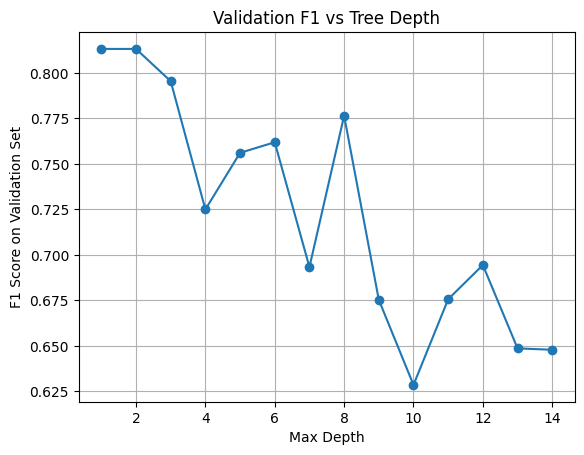

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# avoid_columns_decision_tree = [
decision_tree_dataset = stroke_dft.copy()
decision_tree_dataset['bmi'] = decision_tree_dataset['bmi'].fillna(decision_tree_dataset['bmi'].median())
decision_tree_dataset['gender'] = convert_column_dtype_ascatergory(decision_tree_dataset, 'gender')
decision_tree_dataset['work_type'] = convert_column_dtype_ascatergory(decision_tree_dataset, 'work_type')
decision_tree_dataset['smoking_status'] = convert_column_dtype_ascatergory(decision_tree_dataset, 'smoking_status')   
decision_tree_dataset = pd.get_dummies(decision_tree_dataset, columns=['gender','work_type','smoking_status'])
decision_tree_dataset.drop(columns=['ever_married','Residence_type','bmi_category','age_catergory','glucose_category'], inplace=True)

# Combine predictors_train and target_train into a single DataFrame
# Separate majority and minority classes
majority_df = decision_tree_dataset[decision_tree_dataset['stroke'] == 0]
minority_df = decision_tree_dataset[decision_tree_dataset['stroke'] == 1]

# Undersample the majority class randomly
undersampled_majority = majority_df.sample(n=len(minority_df), random_state=5)

# Combine the undersampled majority class and the minority class
undersampled_data = pd.concat([undersampled_majority, minority_df])

# Shuffle the combined DataFrame to ensure randomness
balanced_data = undersampled_data.sample(frac=1, random_state=5)

# Split the balanced_data into predictors_train and target_train
predictors_train = balanced_data.drop(columns=['stroke'])
target_train = balanced_data['stroke']

# Taking steps to balance the train data
# Split data: train, validation, test (70/15/15)
X_train, X_temp, y_train, y_temp = train_test_split(predictors_train,target_train, test_size=0.3, stratify=target_train, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


depths = range(1, 15)
f1_scores = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_val_pred)
    f1_scores.append(f1)

plt.plot(depths, f1_scores, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("F1 Score on Validation Set")
plt.title("Validation F1 vs Tree Depth")
plt.grid()
plt.show()



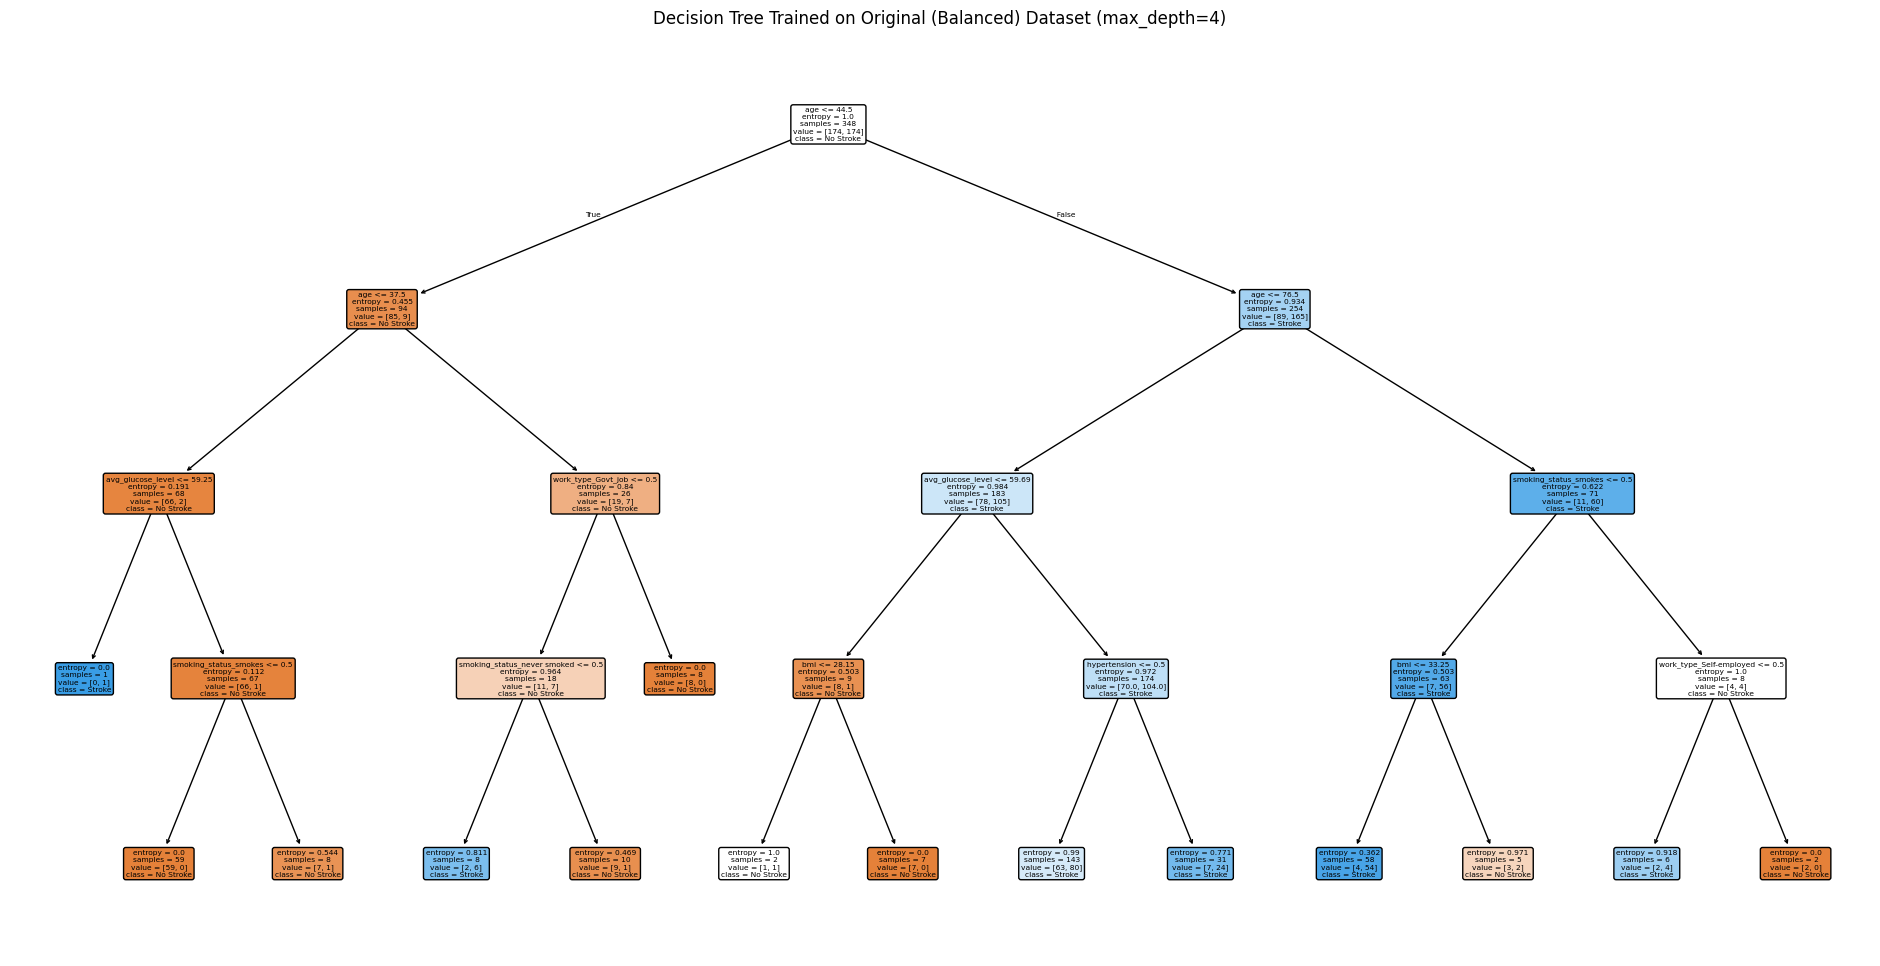

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.54      0.65        37
           1       0.66      0.87      0.75        38

    accuracy                           0.71        75
   macro avg       0.73      0.70      0.70        75
weighted avg       0.73      0.71      0.70        75

Validation Confusion Matrix:
[[20 17]
 [ 5 33]]


In [31]:

# Train the Decision Tree using balanced data
model = DecisionTreeClassifier(criterion = "entropy",max_depth=4, random_state=42)
model.fit(X_train, y_train)

# # Visualize the decision tree
plt.figure(figsize=(24, 12))
plot_tree(model, feature_names=X_train.columns, class_names=["No Stroke", "Stroke"], filled=True, rounded=True)
plt.title("Decision Tree Trained on Original (Balanced) Dataset (max_depth=4)")
plt.show()

# Predict on validation set
y_val_pred = model.predict(X_val)

# Metrics
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))



Over Sampling the data 

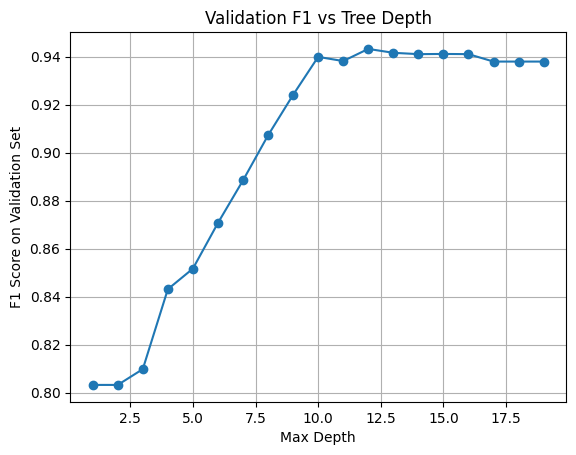

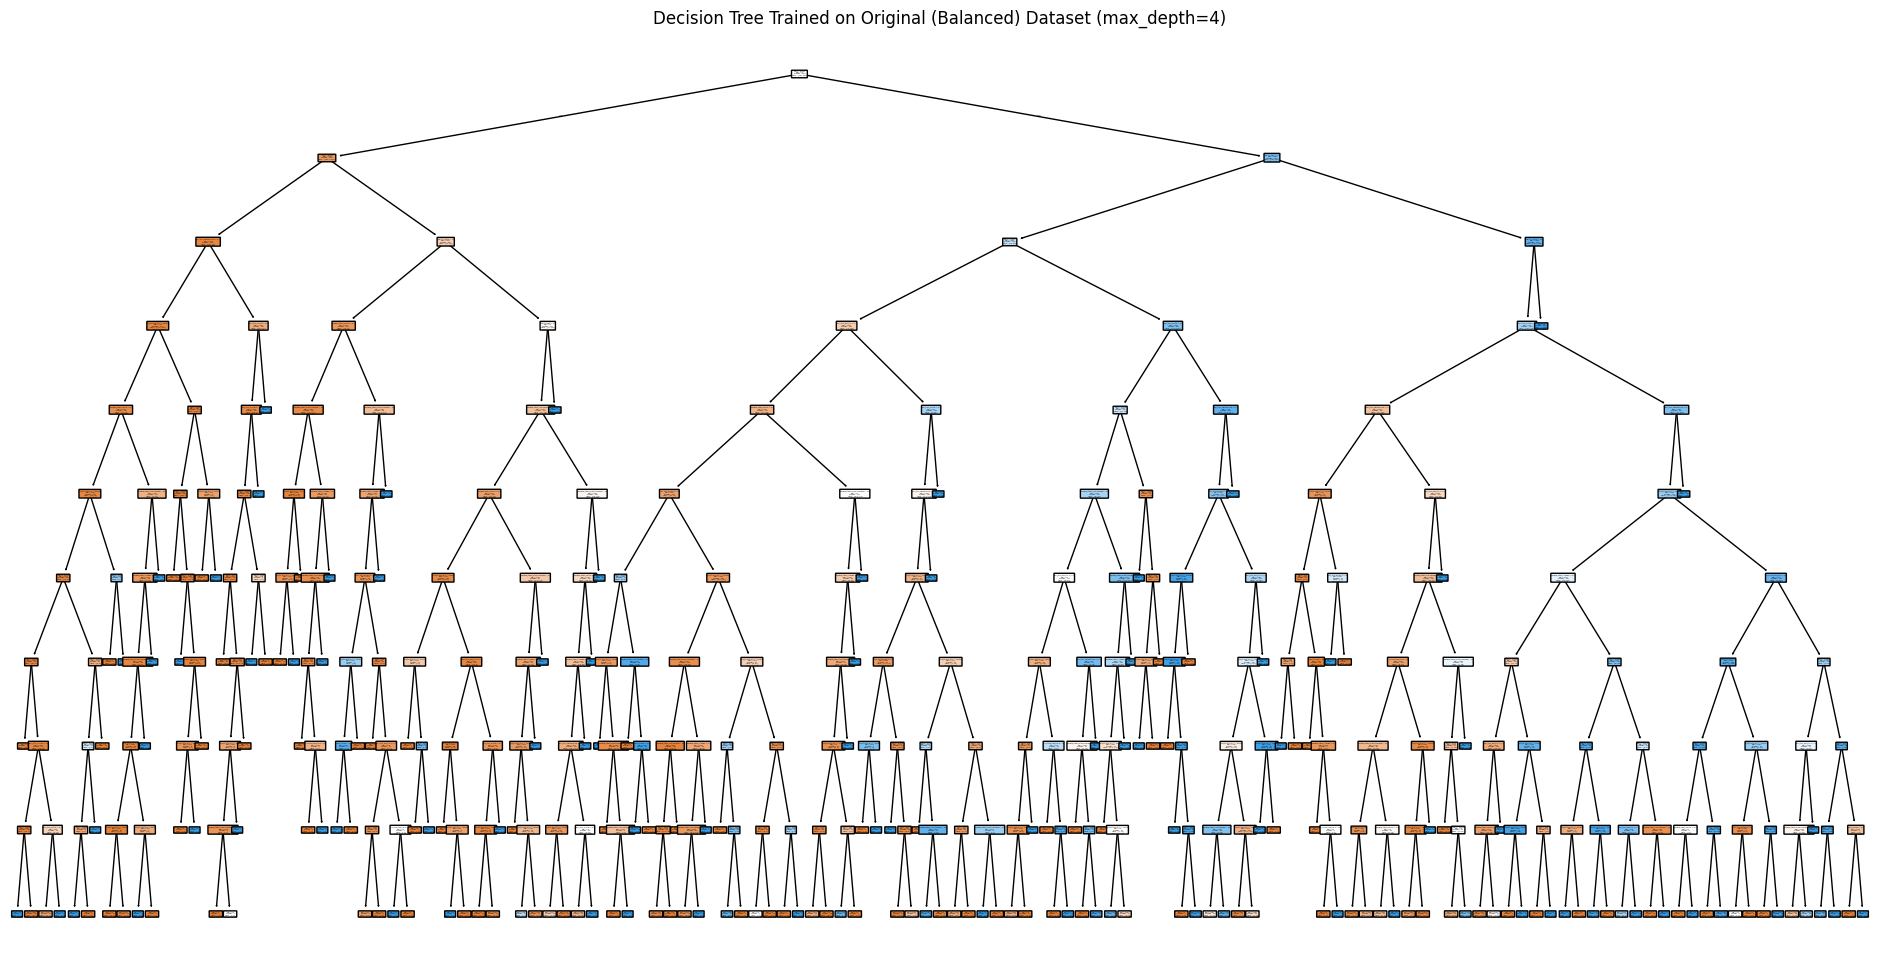

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       729
           1       0.95      0.93      0.94       729

    accuracy                           0.94      1458
   macro avg       0.94      0.94      0.94      1458
weighted avg       0.94      0.94      0.94      1458

Validation Confusion Matrix:
[[691  38]
 [ 49 680]]


In [34]:

# Split the balanced_data into predictors_train and target_train
target_train = decision_tree_dataset['stroke']
predictors_train = decision_tree_dataset.drop(columns=['stroke'])
o_predictors_train,o_target_train =over_sample_data (predictors_train,target_train)

# Taking steps to balance the train data
# Split data: train, validation, test (70/15/15)
X_train, X_temp, y_train, y_temp = train_test_split(o_predictors_train,o_target_train, test_size=0.3, stratify=o_target_train, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


depths = range(1, 20)
f1_scores = []

for d in depths:
    model = DecisionTreeClassifier(criterion = "gini",max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_val_pred)
    f1_scores.append(f1)

plt.plot(depths, f1_scores, marker='o')
plt.xlabel("Max Depth")
plt.ylabel("F1 Score on Validation Set")
plt.title("Validation F1 vs Tree Depth")
plt.grid()
plt.show()


# Train the Decision Tree using balanced data
model = DecisionTreeClassifier(criterion = "gini",max_depth=10, random_state=42)
model.fit(X_train, y_train)

# # Visualize the decision tree
plt.figure(figsize=(24, 12))
plot_tree(model, feature_names=X_train.columns, class_names=["No Stroke", "Stroke"], filled=True, rounded=True)
plt.title("Decision Tree Trained on Original (Balanced) Dataset (max_depth=4)")
plt.show()

# Predict on validation set
y_val_pred = model.predict(X_val)

# Metrics
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("Validation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
